# Notebook Introduction

This notebook contains a compilation of a few interesting data visuals that I got to work on as part of a Dataquest data visualization course. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

## Visual 1

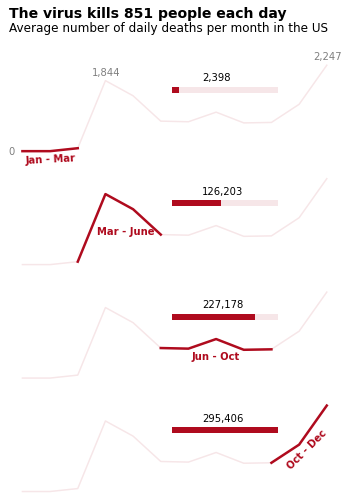

In [2]:
death_toll = pd.read_csv('covid_avg_deaths.csv')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                         figsize=(6,8))
axes = [ax1,ax2,ax3,ax4]
deaths = [2398, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]

for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'], color='#af0b1e', alpha=0.1) #*** Focus here
    ax.set_xticklabels([]) 
    ax.set_yticklabels([]) 
    ax.tick_params(left=False, bottom=False)
    
    #Spine Removal
    for location in ['top','bottom','left','right']:
        ax.spines[location].set_visible(False)
    
#Progress Bar Placement

for ax, xmax, death in zip(axes, xmax_vals, deaths):
    #Background Line
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
    linewidth=6, color='#af0b1e', alpha=0.1)
    
    #Foreground Line
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
    linewidth=6, color='#af0b1e')
    
    #Text Label
    ax.text(x=7.5, y=1850, s='{:,}'.format(death))


#ax1
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e', weight='bold', rotation=3)
ax1.text(0.5, 3500,'The virus kills 851 people each day', size=14, weight='bold')
ax1.text(0.5, 3150,'Average number of daily deaths per month in the US', size=12)

#ax2
ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - June', color='#af0b1e', weight='bold')

#ax3
ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')

#ax4
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold', rotation=45)

plt.show()

## Visual 2

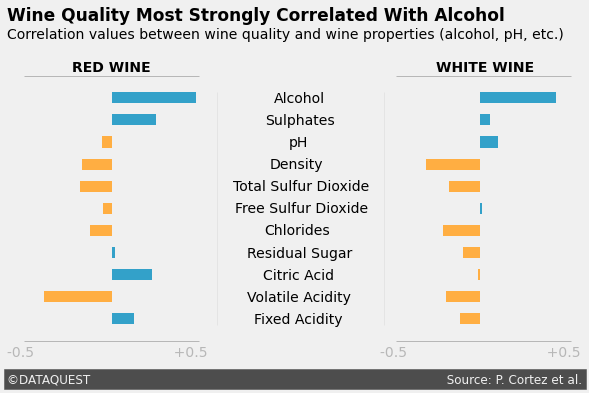

In [4]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_corr =red_wine.corr()['quality'][:-1]
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_corr = white_wine.corr()['quality'][:-1]

positive_white = white_corr >= 0 #assign the boolean vector above to a variable
color_map_white = positive_white.map({True:'#33A1C9', False:'#ffae42'}) #map the true/false to a specific color strings 

positive_red = red_corr >= 0 #assign the boolean vector above to a variable
color_map_red = positive_red.map({True:'#33A1C9', False:'#ffae42'}) #map the true/false to a specific color strings 

#Viz Component
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(9,5))

ax.barh(white_corr.index, white_corr,left=2, height=0.5, color=color_map_white) #Reducing width of bar. Note used height because it is barh vs regular bar
ax.barh(red_corr.index, red_corr, height=0.5, left=-0.1, color=color_map_red)

ax.grid(b=None) #Grid Line Removal
ax.set_yticklabels([]) #Removing ytick labels
ax.set_xticklabels([]) #Removing ytick labels

x_coords = {'Alcohol': 0.82, 'Sulphates': 0.77, 'pH': 0.91,
            'Density': 0.80, 'Total Sulfur Dioxide': 0.59,
            'Free Sulfur Dioxide': 0.6, 'Chlorides': 0.77,
            'Residual Sugar': 0.67, 'Citric Acid': 0.76,
            'Volatile Acidity': 0.67, 'Fixed Acidity': 0.71}
y_coord = 9.8

for label, x_coord in x_coords.items(): ## really helpful when you want to iterate through both key and value in dict
    ax.text(x=x_coord, y=y_coord, s=label)
    y_coord -= 1

#Vertical lines separating labels and bars
ax.axvline(x=1.45, ymin=0.1, ymax=0.9, color='grey', alpha=0.1, linewidth=1)
ax.axvline(x=0.5, ymin=0.1, ymax=0.9, color='grey', alpha=0.1, linewidth=1)

#Horizontal line for the xaxes
ax.axhline(y=-1, xmin=0.01, xmax=0.32, color='grey', alpha=0.5, linewidth=1)
ax.axhline(y=-1, xmin=0.67, xmax=0.98, color='grey', alpha=0.5, linewidth=1)

#xaxes labels
ax.text(-0.7, -1.7, '-0.5'+ ' '*31 + '+0.5', color='grey', alpha=0.5) #Added 31 spaces in between start and end
ax.text(1.43, -1.7, '-0.5'+ ' '*31 + '+0.5',color='grey', alpha=0.5) #Added 31 spaces in between start and end

#Red Wine Title
ax.axhline(y=11, color='grey', linewidth=1, alpha=0.5, xmin=0.01, xmax=0.32)
ax.text(x=-0.33, y=11.2, s='RED WINE', weight='bold')

#White Wine Title
ax.axhline(y=11, color='grey', linewidth=1, alpha=0.5, xmin=0.67, xmax=0.98)
ax.text(x=1.75, y=11.2, s='WHITE WINE', weight='bold')

#Overall Title & Subtitle
ax.text(x=-0.7, y=13.5, s='Wine Quality Most Strongly Correlated With Alcohol', weight='bold', size=17)
ax.text(x=-0.7, y=12.7, s='Correlation values between wine quality and wine properties (alcohol, pH, etc.)')

#Signature bar at the botom with background color
ax.text(-0.7, -2.9, s='©DATAQUEST' + ' '*92 + 'Source: P. Cortez et al.', color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=12)

plt.show()

## Visual 3

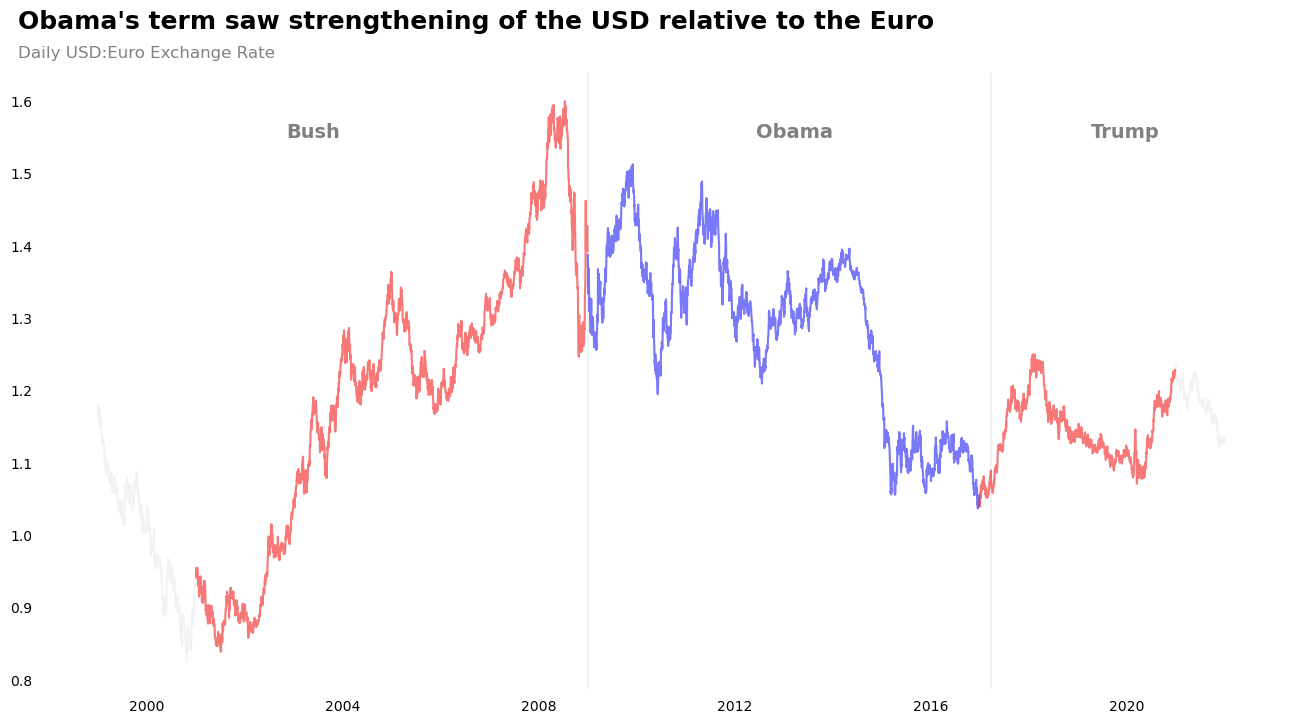

In [5]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

#Data Cleaning
exchange_rates.rename(columns={'[US dollar ]':'USD','Period\\Unit:':'Time'}, inplace=True) #renaming two main columns
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time']) #converting time column from object to datetime type
exchange_rates.sort_values('Time',inplace=True) #sorting based on date
exchange_rates.reset_index(drop=True, inplace=True) #resetting index and dropping old index column
euro_to_dollar = exchange_rates[['Time','USD']]

#Let us drop all the rows that have - in the USD columns
euro_to_dollar = euro_to_dollar[euro_to_dollar['USD']!='-'] #instead of dropping equate initial df back to rows you want
euro_to_dollar['USD'] = euro_to_dollar['USD'].astype(float) #converting column to float type


style.use('default')

fig, ax = plt.subplots(figsize=(16,8))


#Overall
ax.plot(euro_to_dollar['Time'], euro_to_dollar['USD'], color='grey', alpha=0.1)

for position in ['left','right','bottom', 'top']:
    ax.spines[position].set_visible(False)

ax.tick_params(bottom=False, left=False)
ax.text(x=10000, y=1.7, s='Obama\'s term saw strengthening of the USD relative to the Euro',weight='bold', size=18)
ax.text(x=10000, y=1.66, s='Daily USD:Euro Exchange Rate',color='grey',size=12)
ax.axvline(x=14250, ymin=0, ymax=1, alpha=0.1, color='grey')
ax.axvline(x=17250, ymin=0, ymax=1, alpha=0.1, color='grey')

    
#Bush
bush_df = euro_to_dollar[(euro_to_dollar['Time'] >= pd.to_datetime('2001')) & (euro_to_dollar['Time'] < pd.to_datetime('2009'))]
bush_df.reset_index(drop=True, inplace=True)
ax.plot(bush_df['Time'], bush_df['USD'], color='red',alpha=0.5)
ax.text(x=12000, y=1.55, s='Bush', size=14, weight='bold', color='grey')

#Obama
obama_df = euro_to_dollar[(euro_to_dollar['Time'] >= pd.to_datetime('2009')) & (euro_to_dollar['Time'] < pd.to_datetime('2017'))]
obama_df.reset_index(drop=True, inplace=True)
ax.plot(obama_df['Time'], obama_df['USD'], color='blue',alpha=0.5)
ax.text(x=15500, y=1.55, s='Obama', size=14, weight='bold', color='grey')

#Trump
trump_df = euro_to_dollar[(euro_to_dollar['Time'] >= pd.to_datetime('2017')) & (euro_to_dollar['Time'] < pd.to_datetime('2021'))]
trump_df.reset_index(drop=True, inplace=True)
ax.plot(trump_df['Time'], trump_df['USD'], color='red',alpha=0.5)
ax.text(x=18000, y=1.55, s='Trump', size=14, weight='bold', color='grey')


plt.show()

## Visual 4

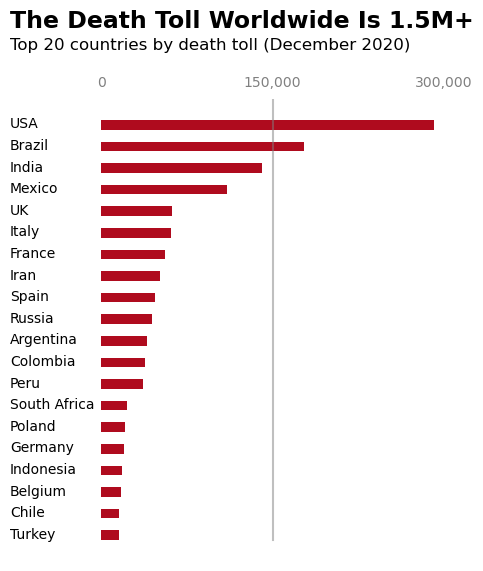

In [6]:
#Let us now add a vertical line at 150,000 to make reading easier 
top20_deathtoll = pd.read_csv('top20_deathtoll.csv')

fig, ax = plt.subplots(figsize=(4.5, 6))

#Plotting the horizontal bar chart
ax.barh(top20_deathtoll['Country_Other'], top20_deathtoll['Total_Deaths'], height=0.45, color='#af0b1e') #link for hex codess in links tab 

#Removing axes
for i in ['left','right','top','bottom']:
    ax.spines[i].set_visible(False)

#Modifying x-axis

ax.set_xticks([0,150000,300000])
ax.set_xticklabels(['0', '150,000', '300,000'])

ax.xaxis.tick_top() #moved x-axis top top
ax.tick_params(axis='x', colors='grey') #changed color of x-axis labels
ax.tick_params(top=False, left=False) #removing the ticks

#Title and Subtitle
ax.text(x=-80000, y=23.5, s='The Death Toll Worldwide Is 1.5M+', size=17, weight='bold') #title
ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)', size=12) #subtitle

#Left align y-axis labels
ax.set_yticklabels([]) # an empty list removes the labels
country_names = top20_deathtoll['Country_Other']
for i, country in zip(range(20), country_names):
    ax.text(x=-80000, y=i-0.15, s=country)
    
#--

# Code for vertical line that is not too long (ymin) and is grey (c) in color and has transparency (alpha)    
ax.axvline(x=150000, ymin=0.045, c='grey', alpha=0.5)

plt.show()

## Visual 5

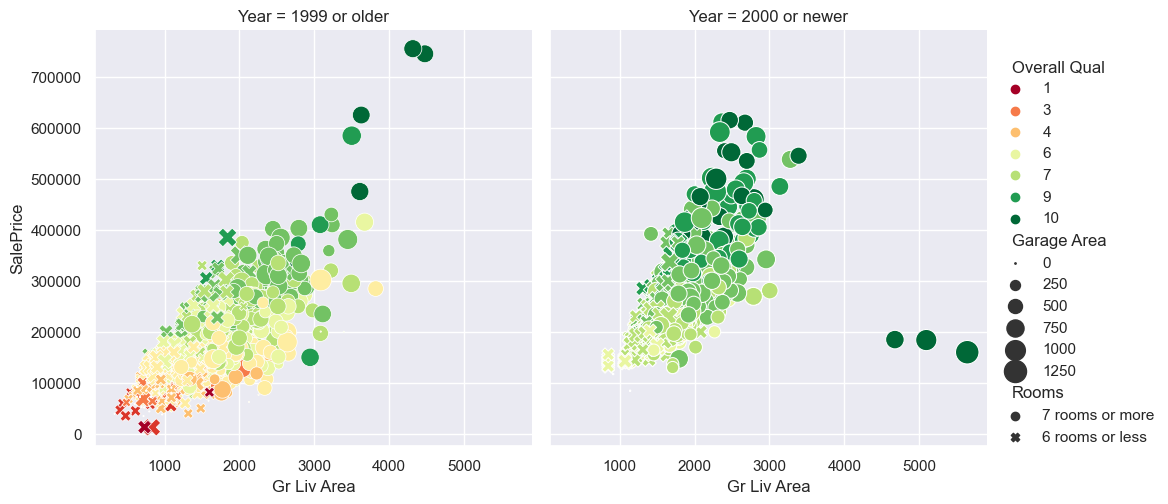

In [9]:
housing = pd.read_csv('housing.csv')

sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', col='Year')
plt.show()